**Course Description**

Being able to combine and work with multiple datasets is an essential skill for any aspiring Data Scientist. pandas is a crucial cornerstone of the Python data science ecosystem, with Stack Overflow recording 5 million views for pandas questions. Learn to handle multiple DataFrames by combining, organizing, joining, and reshaping them using pandas. You'll work with datasets from the World Bank and the City Of Chicago. You will finish the course with a solid skillset for data-joining in pandas.

# Data Merging Basics

Learn how you can merge disparate data using inner joins. By combining information from multiple sources you’ll uncover compelling insights that may have previously been hidden. You’ll also learn how the relationship between those sources, such as one-to-one or one-to-many, can affect your result.

## Inner join

### What column to merge on?

Chicago provides a list of taxicab owners and vehicles licensed to
operate within the city, for public safety. Your goal is to merge two
tables together. One table is called `taxi_owners`, with info about the
taxi cab company owners, and one is called `taxi_veh`, with info about
each taxi cab vehicle. Both the `taxi_owners` and `taxi_veh` tables have
been loaded for you and you can explore them in the IPython shell.

Choose the column you would use to merge the two tables on using the
`.merge()` method.

- [ ] `on='rid'`
- [x] `on='vid'`
- [ ] `on='year'`
- [ ] `on='zip'`

### Your first inner join

You have been tasked with figuring out what the most popular types of
fuel used in Chicago taxis are. To complete the analysis, you need to
merge the `taxi_owners` and `taxi_veh` tables together on the `vid`
column. You can then use the merged table along with the
`.value_counts()` method to find the most common `fuel_type`.

Since you'll be working with `pandas` throughout the course, the package
will be preloaded for you as `pd` in each exercise in this course. Also
the `taxi_owners` and `taxi_veh` DataFrames are loaded for you.

-   Merge `taxi_owners` with `taxi_veh` on the column `vid`, and save
    the result to `taxi_own_veh`.

<!-- -->

-   Set the left and right table suffixes for overlapping columns of the
    merge to `_own` and `_veh`, respectively.

<!-- -->

-   Select the `fuel_type` column from `taxi_own_veh` and print the
    `value_counts()` to find the most popular `fuel_type`s used.


In [1]:
# edited/added
import pandas as pd
taxi_owners = pd.read_pickle('taxi_owners.p')
taxi_veh = pd.read_pickle('taxi_vehicles.p')

# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())


Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')
Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')
fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64


### Inner joins and number of rows returned

All of the merges you have studied to this point are called inner joins.
It is necessary to understand that inner joins only return the rows with
matching values in both tables. You will explore this further by
reviewing the merge between the `wards` and `census` tables, then
comparing it to merges of copies of these tables that are slightly
altered, named `wards_altered`, and `census_altered`. The first row of
the `wards` column has been changed in the altered tables. You will
examine how this affects the merge between them. The tables have been
loaded for you.

For this exercise, it is important to know that the `wards` and `census`
tables start with **50** rows.

-   Merge `wards` and `census` on the `ward` column and save the result
    to `wards_census`.

<!-- -->

-   Merge the `wards_altered` and `census` tables on the `ward` column,
    and notice the difference in returned rows.

<!-- -->

-   Merge the `wards` and `census_altered` tables on the `ward` column,
    and notice the difference in returned rows.


In [2]:
# edited/added
wards = pd.read_pickle('ward.p').astype(object)
census = pd.read_pickle('census.p').astype(object)
wards_altered = pd.read_csv('wards_altered.csv').astype(object)
census_altered = pd.read_csv('census_altered.csv').astype(object)

# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

# Print the first few rows of the wards_altered table to view the change 
print(wards_altered[['ward']].head())

# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on='ward')

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)

# Print the first few rows of the census_altered table to view the change 
print(census_altered[['ward']].head())

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on='ward')

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)


wards_census table shape: (50, 9)
  ward
0   61
1    2
2    3
3    4
4    5
wards_altered_census table shape: (0, 9)
  ward
0  NaN
1  2.0
2  3.0
3  4.0
4  5.0
wards_census_altered table shape: (0, 9)


## One-to-many relationships

#### One-to-many classification

Understanding the difference between a one-to-one and one-to-many
relationship is a useful skill. In this exercise, consider a set of
tables from an e-commerce website. The hypothetical tables are the
following:

- A `customer` table with information about each customer
- A `cust_tax_info` table with customers unique tax IDs
- An `orders` table with information about each order
- A `products` table with details about each unique product sold
- An `inventory` table with information on how much total inventory is
  available to sell for each product

-   Select the relationship type that is most appropriate for the
relationship between the different tables: **One-to-one**, or
**One-to-many**.

##### One-to-one

The relationship between `products` and `inventory`.
The relationship between `customer` and `cust_tax_info`.

##### One-to-many

The relationship between the `products` and `orders`.
The relationship between the `customers` and `orders`.

### One-to-many merge

A business may have one or multiple owners. In this exercise, you will
continue to gain experience with one-to-many merges by merging a table
of business owners, called `biz_owners`, to the `licenses` table. Recall
from the video lesson, with a one-to-many relationship, a row in the
left table may be repeated if it is related to multiple rows in the
right table. In this lesson, you will explore this further by finding
out what is the most common business owner title. (i.e., secretary, CEO,
or vice president)

The `licenses` and `biz_owners` DataFrames are loaded for you.

-   Starting with the `licenses` table on the left, merge it to the
    `biz_owners` table on the column `account`, and save the results to
    a variable named `licenses_owners`.
-   Group `licenses_owners` by `title` and count the number of accounts
    for each title. Save the result as `counted_df`
-   Sort `counted_df` by the number of **accounts** in **descending
    order**, and save this as a variable named `sorted_df`.
-   Use the `.head()` method to print the first few rows of the
    `sorted_df`.


In [3]:
# edited/added
licenses = pd.read_pickle('licenses.p')
biz_owners = pd.read_pickle('business_owners.p')

# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values(by='account', ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())


                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


## Merging multiple DataFrames

### Total riders in a month

Your goal is to find the total number of rides provided to passengers
passing through the Wilson station (`station_name == 'Wilson'`) when
riding Chicago's public transportation system on weekdays
(`day_type == 'Weekday'`) in July (`month == 7`). Luckily, Chicago
provides this detailed data, but it is in three different tables. You
will work on merging these tables together to answer the question. This
data is different from the business related data you have seen so far,
but all the information you need to answer the question is provided.

The `cal`, `ridership`, and `stations` DataFrames have been loaded for
you. The relationship between the tables can be seen in the diagram
below.

![Table diagram. The cal table relates to ridership via year, month, and
day. The ridership table relates to the stations table via
station_id.](https://assets.datacamp.com/production/repositories/5486/datasets/56b5ecb2edcdc896c69effdf05ef65e5454ff996/cta_L_diagram.png)

-   Merge the `ridership` and `cal` tables together, starting with the
`ridership` table on the left and save the result to the variable
`ridership_cal`. If you code takes too long to run, your merge
conditions might be incorrect.
-   Extend the previous merge to three tables by also merging the `stations`
table.
-   Create a variable called `filter_criteria` to select the appropriate
rows from the merged table so that you can sum the `rides` column.


In [4]:
# edited/added
ridership = pd.read_pickle('cta_ridership.p')
cal = pd.read_pickle('cta_calendar.p')
stations = pd.read_pickle('stations.p')

# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=['year','month','day'])

# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']).merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) & (ridership_cal_stations['day_type'] == 'Weekday') & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())


140005


### Three table merge

To solidify the concept of a three DataFrame merge, practice another
exercise. A reasonable extension of our review of Chicago business data
would include looking at demographics information about the
neighborhoods where the businesses are. A table with the median income
by zip code has been provided to you. You will merge the `licenses` and
`wards` tables with this new income-by-zip-code table called `zip_demo`.

The `licenses`, `wards`, and `zip_demo` DataFrames have been loaded for
you.

-   Starting with the `licenses` table, merge to it the `zip_demo` table
    on the `zip` column. Then merge the resulting table to the `wards`
    table on the `ward` column. Save result of the three merged tables
    to a variable named `licenses_zip_ward`.
-   Group the results of the three merged tables by the column
    `alderman` and find the median `income`.


In [5]:
# edited/added
wards = pd.read_pickle('ward.p')
licenses = pd.read_pickle('licenses.p')
zip_demo = pd.read_pickle('zip_demo.p')

# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards, on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))


                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

### One-to-many merge with multiple tables

In this exercise, assume that you are looking to start a business in the
city of Chicago. Your perfect idea is to start a company that uses goats
to mow the lawn for other businesses. However, you have to choose a
location in the city to put your goat farm. You need a location with a
great deal of space and relatively few businesses and people around to
avoid complaints about the smell. You will need to merge three tables to
help you choose your location. The `land_use` table has info on the
percentage of vacant land by city ward. The `census` table has
population by ward, and the `licenses` table lists businesses by ward.

The `land_use`, `census`, and `licenses` tables have been loaded for
you.

-   Merge `land_use` and `census` on the `ward` column. Merge the result of
this with `licenses` on the `ward` column, using the suffix `_cen` for
the left table and `_lic` for the right table. Save this to the variable
`land_cen_lic`.
-   Group `land_cen_lic` by `ward`, `pop_2010` (the population in 2010), and
`vacant`, then count the number of `accounts`. Save the results to
`pop_vac_lic`.
-   Sort `pop_vac_lic` by `vacant`, `account`, and`pop_2010` in descending,
ascending, and ascending order respectively. Save it as
`sorted_pop_vac_lic`.


In [6]:
# edited/added
land_use = pd.read_pickle('land_use.p')

# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward').merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())


   ward pop_2010  vacant  account
47    7    51581      19       80
12   20    52372      15      123
1    10    51535      14      130
16   24    54909      13       98
7    16    51954      13      156


# Merging Tables With Different Join Types

Take your knowledge of joins to the next level. In this chapter, you’ll work with TMDb movie data as you learn about left, right, and outer joins. You’ll also discover how to merge a table to itself and merge on a DataFrame index.

## Left join

### Counting missing rows with left join

The Movie Database is supported by volunteers going out into the world,
collecting data, and entering it into the database. This includes
financial data, such as movie budget and revenue. If you wanted to know
which movies are still missing data, you could use a left join to
identify them. Practice using a left join by merging the `movies` table
and the `financials` table.

The `movies` and `financials` tables have been loaded for you.

What column is likely the best column to merge the two tables on?

- [ ] `on='budget'`
- [ ] `on='popularity'`
- [x] `on='id'`

-   Merge the `movies` table, as the left table, with the `financials` table
using a left join, and save the result to `movies_financials`.
-   Count the number of rows in `movies_financials` with a null value in the
`budget` column.


In [7]:
# edited/added
movies = pd.read_pickle('movies.p')
financials = pd.read_pickle('financials.p')

# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)


1574


### Enriching a dataset

Setting `how='left'` with the `.merge()`method is a useful technique for
enriching or enhancing a dataset with additional information from a
different table. In this exercise, you will start off with a sample of
movie data from the movie series *Toy Story*. Your goal is to enrich
this data by adding the marketing tag line for each movie. You will
compare the results of a left join versus an inner join.

The `toy_story` DataFrame contains the *Toy Story* movies. The
`toy_story` and `taglines` DataFrames have been loaded for you.

-   Merge `toy_story` and `taglines` on the `id` column with a **left
    join**, and save the result as `toystory_tag`.

<!-- -->

-   With `toy_story` as the left table, merge to it `taglines` on the
    `id` column with an **inner join**, and save as `toystory_tag`.


In [8]:
# edited/added
toy_story = movies[movies['title'].str.contains('Toy Story')]
taglines = pd.read_pickle('taglines.p')

# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on='id', how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id', how='inner')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)


      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)
      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


### How many rows with a left join?

Select the **true** statement about left joins.

Try running the following code statements in the IPython shell.

-   `left_table.merge(one_to_one, on='id', how='left').shape`
-   `left_table.merge(one_to_many, on='id', how='left').shape`

Note that the `left_table` starts out with **4** rows.

- [ ] The output of a one-to-one merge with a left join will have more rows
than the left table.
- [ ] The output of a one-to-one merge with a left join will have fewer rows
than the left table.
- [x] The output of a one-to-many merge with a left join will have greater
than or equal rows than the left table.

## Other joins

### Right join to find unique movies

Most of the recent big-budget science fiction movies can also be
classified as action movies. You are given a table of science fiction
movies called `scifi_movies` and another table of action movies called
`action_movies`. Your goal is to find which movies are considered only
science fiction movies. Once you have this table, you can merge the
`movies` table in to see the movie names. Since this exercise is related
to science fiction movies, use a right join as your superhero power to
solve this problem.

The `movies`, `scifi_movies`, and `action_movies` tables have been
loaded for you.

-   Merge `action_movies` and `scifi_movies` tables with a **right
    join** on `movie_id`. Save the result as `action_scifi`.

<!-- -->

-   Update the merge to add suffixes, where `'_act'` and `'_sci'` are
    suffixes for the left and right tables, respectively.

<!-- -->

-   From `action_scifi`, subset only the rows where the `genre_act`
    column is null.

<!-- -->

-   Merge `movies` and `scifi_only` using the `id` column in the left
    table and the `movie_id` column in the right table with an inner
    join.


In [9]:
# edited/added
movie_to_genres = pd.read_pickle('movie_to_genres.p')
action_movies = movie_to_genres[movie_to_genres['genre'] == 'Action']
scifi_movies = movie_to_genres[movie_to_genres['genre'] == 'Science Fiction']

# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right')

# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',suffixes=('_act','_sci'))

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, how='inner', left_on='id', right_on='movie_id')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)


   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction
      id                         title  popularity release_date  movie_id   
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841  \
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


### Popular genres with right join

What are the genres of the most popular movies? To answer this question,
you need to merge data from the `movies` and `movie_to_genres` tables.
In a table called `pop_movies`, the top 10 most popular movies in the
`movies` table have been selected. To ensure that you are analyzing all
of the popular movies, merge it with the `movie_to_genres` table using a
right join. To complete your analysis, count the number of different
genres. Also, the two tables can be merged by the movie ID. However, in
`pop_movies` that column is called `id`, and in `movies_to_genres` it's
called `movie_id`.

The `pop_movies` and `movie_to_genres` tables have been loaded for you.

-   Merge `movie_to_genres` and `pop_movies` using a right join. Save
    the results as `genres_movies`.
-   Group `genres_movies` by `genre` and count the number of `id`
    values.


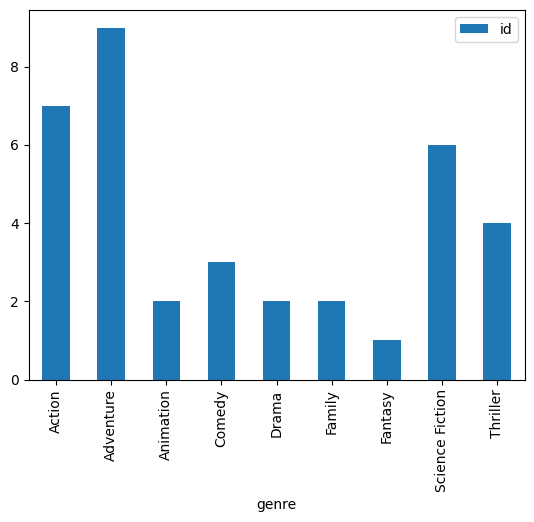

In [10]:
# edited/added
import matplotlib.pyplot as plt
pop_movies = pd.read_csv('pop_movies.csv')

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on='movie_id', 
                                      right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()


### Using outer join to select actors

One cool aspect of using an outer join is that, because it returns all
rows from both merged tables and null where they do not match, you can
use it to find rows that do not have a match in the other table. To try
for yourself, you have been given two tables with a list of actors from
two popular movies: *Iron Man 1* and *Iron Man 2*. Most of the actors
played in both movies. Use an outer join to find actors who ***did
not*** act in both movies.

The *Iron Man 1* table is called `iron_1_actors`, and *Iron Man 2* table
is called `iron_2_actors`. Both tables have been loaded for you and a
few rows printed so you can see the structure.

![Venn graph with no
overlap](https://assets.datacamp.com/production/repositories/5486/datasets/c5d02ebba511e90ae132f89ff091e6729c040bd2/noJoin.png)

-   Save to `iron_1_and_2` the merge of `iron_1_actors` (left) with
    `iron_2_actors` tables with an outer join on the `id` column, and
    set suffixes to `('_1','_2')`.
-   Create an index that returns `True` if `name_1` or `name_2` are
    null, and `False` otherwise.


In [11]:
# edited/added
iron_1_actors = pd.read_csv('iron_1_actors.csv')
iron_2_actors = pd.read_csv('iron_2_actors.csv')

# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, 
                                     on='id', 
                                     how='outer', 
                                     suffixes=('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())


                   character_1      id           name_1 character_2 name_2
0                       Yinsen   17857       Shaun Toub         NaN    NaN
2  Obadiah Stane / Iron Monger    1229     Jeff Bridges         NaN    NaN
3                  War Machine   18288  Terrence Howard         NaN    NaN
5                         Raza   57452      Faran Tahir         NaN    NaN
8                   Abu Bakaar  173810    Sayed Badreya         NaN    NaN


## Merging a table to itself

### Self join

Merging a table to itself can be useful when you want to compare values
in a column to other values in the same column. In this exercise, you
will practice this by creating a table that for each movie will list the
movie director and a member of the crew on one row. You have been given
a table called `crews`, which has columns `id`, `job`, and `name`.
First, merge the table to itself using the movie ID. This merge will
give you a larger table where for each movie, every job is matched
against each other. Then select only those rows with a director in the
left table, and avoid having a row where the director's job is listed in
both the left and right tables. This filtering will remove job
combinations that aren't with the director.

The `crews` table has been loaded for you.

-   To a variable called `crews_self_merged`, merge the `crews` table to
itself on the `id` column using an inner join, setting the suffixes to
`'_dir'` and `'_crew'` for the left and right tables respectively.
-   Create a Boolean index, named `boolean_filter`, that selects rows from
the left table with the *job* of `'Director'` and avoids rows with the
*job* of `'Director'` in the right table.
-   Use the `.head()` method to print the first few rows of `direct_crews`.


In [12]:
# edited/added
crews = pd.read_pickle('crews.p')

# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner', suffixes=('_dir','_crew'))

# Create a Boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())


        id department_dir   job_dir       name_dir department_crew   
156  19995      Directing  Director  James Cameron         Editing  \
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


### How does pandas handle self joins?

Select the **false** statement about merging a table to itself.

- [ ] You can merge a table to itself with a right join.
- [ ] Merging a table to itself can allow you to compare values in a column to
other values in the same column.
- [x] The pandas module limits you to one merge where you merge a table to
itself. You cannot repeat this process over and over.
- [ ] Merging a table to itself is like working with two separate tables.

## Merging on indexes

### Index merge for movie ratings

To practice merging on indexes, you will merge `movies` and a table
called `ratings` that holds info about movie ratings. Make sure your
merge returns **all** of the rows from the `movies` table and not all
the rows of `ratings` table need to be included in the result.

The `movies` and `ratings` tables have been loaded for you.

-   Merge `movies` and `ratings` on the index and save to a variable
    called `movies_ratings`, ensuring that all of the rows from the
    `movies` table are returned.


In [13]:
# edited/added
ratings = pd.read_pickle('ratings.p')

# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id', how='left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())


      id                 title  popularity release_date  vote_average   
0    257          Oliver Twist   20.415572   2005-09-23           6.7  \
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


### Do sequels earn more?

It is time to put together many of the aspects that you have learned in
this chapter. In this exercise, you'll find out which movie sequels
earned the most compared to the original movie. To answer this question,
you will merge a modified version of the `sequels` and `financials`
tables where their index is the movie ID. You will need to choose a
merge type that will return all of the rows from the `sequels` table and
not all the rows of `financials` table need to be included in the
result. From there, you will join the resulting table to itself so that
you can compare the revenue values of the original movie to the sequel.
Next, you will calculate the difference between the two revenues and
sort the resulting dataset.

The `sequels` and `financials` tables have been provided.

-   With the `sequels` table on the left, merge to it the `financials` table
on index named `id`, ensuring that all the rows from the `sequels` are
returned and some rows from the other table may not be returned, Save
the results to `sequels_fin`.
-   Merge the `sequels_fin` table to itself with an inner join, where the
left and right tables merge on `sequel` and `id` respectively with
suffixes equal to `('_org','_seq')`, saving to `orig_seq`.
-   Select the `title_org`, `title_seq`, and `diff` columns of `orig_seq`
and save this as `titles_diff`.


In [14]:
# edited/added
sequels = pd.read_pickle('sequels.p').astype(object)
financials = pd.read_pickle('financials.p')

# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', right_on='id', right_index=True, suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]


# Advanced Merging and Concatenating

In this chapter, you’ll leverage powerful filtering techniques, including semi-joins and anti-joins. You’ll also learn how to glue DataFrames by vertically combining and using the pandas.concat function to create new datasets. Finally, because data is rarely clean, you’ll also learn how to validate your newly combined data structures.

## Filtering joins

### Steps of a semi join

In the last video, you were shown how to perform a semi join with
`pandas`. In this exercise, you'll solidify your understanding of the
necessary steps. Recall that a semi join filters the left table to only
the rows where a match exists in both the left and right tables.

-   Sort the steps in the correct order of the technique shown to perform a
semi join in `pandas`.

1. Merge the left and right tables on key column using an inner join.
2. Search if the key column in the left table is in the merged tables using
the `.isin()` method creating a Boolean `Series`.
3. Subset the rows of the left table.

### Performing an anti join

In our music streaming company dataset, each customer is assigned an
employee representative to assist them. In this exercise, filter the
employee table by a table of top customers, returning only those
employees who are **not** assigned to a customer. The results should
resemble the results of an anti join. The company's leadership will
assign these employees additional training so that they can work with
high valued customers.

The `top_cust` and `employees` tables have been provided for you.

-   Merge `employees` and `top_cust` with a left join, setting `indicator`
argument to `True`. Save the result to `empl_cust`.
-   Select the `srid` column of `empl_cust` and the rows where `_merge` is
`'left_only'`. Save the result to `srid_list`.
-   Subset the `employees` table and select those rows where the `srid` is
in the variable `srid_list` and print the results.


In [15]:
 # edited/added
employees = pd.read_csv('employees.csv')
top_cust = pd.read_csv('top_cust.csv')

# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])


   srid     lname    fname            title  hire_date   
0     1     Adams   Andrew  General Manager 2002-08-14  \
1     2   Edwards       cy    Sales Manager 2002-05-01   
5     6  Mitchell  Michael       IT Manager 2003-10-17   
6     7      King   Robert         IT Staff 2004-01-02   
7     8  Callahan    Laura         IT Staff 2004-03-04   

                     email  
0   andrew@chinookcorp.com  
1       cy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


### Performing a semi join

Some of the tracks that have generated the most significant amount of
revenue are from TV-shows or are other non-musical audio. You have been
given a table of invoices that include top revenue-generating items.
Additionally, you have a table of non-musical tracks from the streaming
service. In this exercise, you'll use a semi join to find the top
revenue-generating non-musical tracks..

The tables `non_mus_tcks`, `top_invoices`, and `genres` have been loaded
for you.

-   Merge `non_mus_tcks` and `top_invoices` on `tid` using an inner
    join. Save the result as `tracks_invoices`.
-   Use `.isin()` to subset the rows of `non_mus_tck` where `tid` is in
    the `tid` column of `tracks_invoices`. Save the result as
    `top_tracks`.
-   Group `top_tracks` by `gid` and count the `tid` rows. Save the
    result to `cnt_by_gid`.
-   Merge `cnt_by_gid` with the `genres` table on `gid` and print the
    result.


In [16]:
# edited/added
non_mus_tcks = pd.read_csv('non_mus_tcks.csv')
top_invoices = pd.read_csv('top_invoices.csv')
genres = pd.read_csv('genres.csv')

# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

# Use .isin() to subset non_mus_tcsk to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on='gid'))


   gid  tid
0   19    4
1   21    2
2   22    1


## Concatenate DataFrames together vertically

### Concatenation basics

You have been given a few tables of data with musical track info for
different albums from the metal band, *Metallica*. The track info comes
from their *Ride The Lightning*, *Master Of Puppets*, and *St. Anger*
albums. Try various features of the `.concat()` method by concatenating
the tables vertically together in different ways.

The tables `tracks_master`, `tracks_ride`, and `tracks_st` have loaded
for you.

-   Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, in that
    order, setting `sort` to `True`.

<!-- -->

-   Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, where
    the index goes from 0 to n-1.

<!-- -->

-   Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, showing
    only columns that are in all tables.


In [17]:
# edited/added
tracks_master = pd.read_csv('tracks_master.csv')
tracks_ride = pd.read_csv('tracks_ride.csv')
tracks_st = pd.read_csv('tracks_st.csv')

# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)
print(tracks_from_albums)

# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], ignore_index=True, sort=True)
print(tracks_from_albums)

# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], join='inner', sort=True)
print(tracks_from_albums)


   aid  gid  mtid                     name   tid  u_price
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.90
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99
    aid  gid  mtid                     name   tid  u_price
0   155    3 

### Concatenating with keys

The leadership of the music streaming company has come to you and asked
you for assistance in analyzing sales for a recent business quarter.
They would like to know which month in the quarter saw the highest
average invoice total. You have been given three tables with invoice
data named `inv_jul`, `inv_aug`, and `inv_sep`. Concatenate these tables
into one to create a graph of the average monthly invoice total.

-   Concatenate the three tables together vertically in order with the
    oldest month first, adding `'7Jul'`, `'8Aug'`, and `'9Sep'` as
    `keys` for their respective months, and save to variable
    `avg_inv_by_month`.
-   Use the `.agg()` method to find the average of the `total` column
    from the grouped invoices.
-   Create a bar chart of `avg_inv_by_month`.


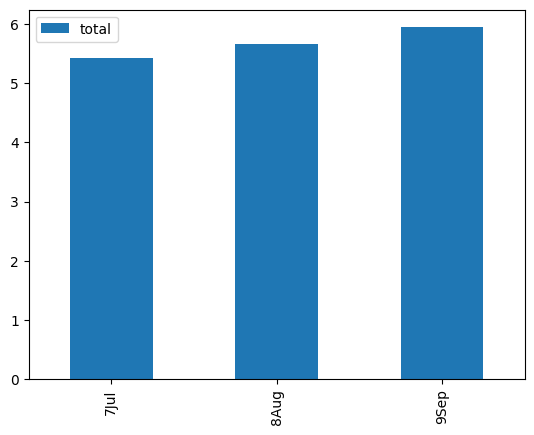

In [18]:
# edited/added
inv_jul = pd.read_csv('inv_jul.csv')
inv_aug = pd.read_csv('inv_aug.csv')
inv_sep = pd.read_csv('inv_sep.csv')

# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()


## Verifying integrity

### Validating a merge

You have been given 2 tables, `artists`, and `albums`. Use the IPython
shell to merge them using `artists.merge(albums, on='artid').head()`.
Adjust the `validate` argument to answer which statement is ***False***.

- [ ] You can use `'many_to_many'` without an error, since there is a
duplicate key in one of the tables.
- [ ] You can use `'one_to_many'` without error, since there is a duplicate
key in the right table.
- [x] You can use `'many_to_one'` without an error, since there is a duplicate
key in the left table.

### Concatenate and merge to find common songs

The senior leadership of the streaming service is requesting your help
again. You are given the historical files for a popular playlist in the
classical music genre in 2018 and 2019. Additionally, you are given a
similar set of files for the most popular pop music genre playlist on
the streaming service in 2018 and 2019. Your goal is to concatenate the
respective files to make a large classical playlist table and overall
popular music table. Then filter the classical music table using a semi
join to return only the most popular classical music tracks.

The tables `classic_18`, `classic_19`, and `pop_18`, `pop_19` have been
loaded for you. Additionally, `pandas` has been loaded as `pd`.

-   Concatenate the `classic_18` and `classic_19` tables vertically where
the index goes from 0 to n-1, and save to `classic_18_19`.
-   Concatenate the `pop_18` and `pop_19` tables vertically where the index
goes from 0 to n-1, and save to `pop_18_19`.
-   With `classic_18_19` on the left, merge it with `pop_18_19` on `tid`
using an inner join.
-   Use `.isin()` to filter `classic_18_19` where `tid` is in `classic_pop`.


In [19]:
 # edited/added
classic_18 = pd.read_csv('classic_18.csv')
classic_19 = pd.read_csv('classic_19.csv')
pop_18 = pd.read_csv('pop_18.csv')
pop_19 = pd.read_csv('pop_19.csv')

# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on='tid')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)


    pid   tid
3    12  3479
10   12  3439
21   12  3445
23   12  3449
48   12  3437
50   12  3435


# Merging Ordered and Time-Series Data

In this final chapter, you’ll step up a gear and learn to apply pandas' specialized methods for merging time-series and ordered data together with real-world financial and economic data from the city of Chicago. You’ll also learn how to query resulting tables using a SQL-style format, and unpivot data using the melt method.

## Using merge_ordered()

### Correlation between GDP and S&P500

In this exercise, you want to analyze stock returns from the S&P 500.
You believe there may be a relationship between the returns of the S&P
500 and the GDP of the US. Merge the different datasets together to
compute the correlation.

Two tables have been provided for you, named `sp500`, and `gdp`. As
always, `pandas` has been imported for you as `pd`.

-   Concatenate the `classic_18` and `classic_19` tables vertically where
the index goes from 0 to n-1, and save to `classic_18_19`.
-   Concatenate the `pop_18` and `pop_19` tables vertically where the index
goes from 0 to n-1, and save to `pop_18_19`.
-   With `classic_18_19` on the left, merge it with `pop_18_19` on `tid`
using an inner join.
-   Use `.isin()` to filter `classic_18_19` where `tid` is in `classic_pop`.


In [20]:
 # edited/added
gdp = pd.read_csv('gdp1.csv')
gdp.columns = gdp.columns.str.lower()
sp500 = pd.read_csv('S&P500.csv')
sp500.columns = sp500.columns.str.lower()

# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left')

# Print gdp_sp500
print(gdp_sp500)

# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left',  fill_method='ffill')

# Print gdp_sp500
print (gdp_sp500)

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp','returns']]

# edited/added
gdp_returns = gdp_returns.astype(float)

# Print gdp_returns correlation
print(gdp_returns.corr())


     country name country code     indicator name  year           gdp    date   
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010.0  \
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010.0   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010.0   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010.0   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011.0   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011.0   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011.0   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011.0   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012.0   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012.0   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012.0   
11  United States          U

### Phillips curve using merge_ordered()

There is an economic theory developed by A. W. Phillips which states
that inflation and unemployment have an inverse relationship. The theory
claims that with economic growth comes inflation, which in turn should
lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor
Statistics, containing unemployment and inflation data over different
periods, and create a Phillips curve. The tables have different
frequencies. One table has a data entry every six months, while the
other has a data entry every month. You will need to use the entries
where you have data within both tables.

The tables `unemployment` and `inflation` have been loaded for you.

-   Use `merge_ordered()` to merge the `inflation` and `unemployment`
    tables on `date` with an inner join, and save the results as
    `inflation_unemploy`.
-   Print the `inflation_unemploy` variable.
-   Using `inflation_unemploy`, create a scatter plot with
    `unemployment_rate` on the horizontal axis and `cpi` (inflation) on
    the vertical axis.


         date      cpi     seriesid                  data_type   
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX  \
1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


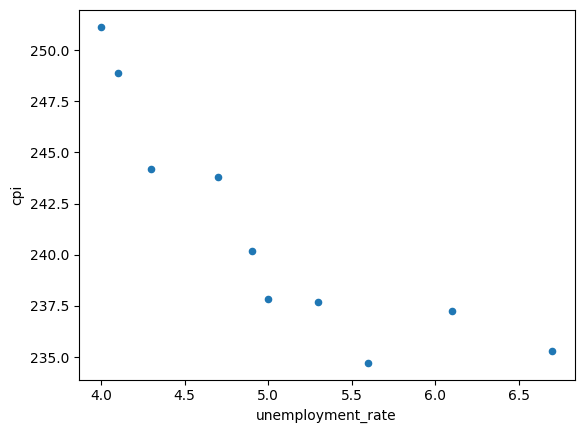

In [21]:
# edited/added
inflation = pd.read_csv('inflation.csv')
unemployment = pd.read_csv('unemployment.csv')

# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, 
                                      on='date', how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi')
plt.show()


### merge_ordered() caution, multiple columns

When using `merge_ordered()` to merge on multiple columns, the order is
important when you combine it with the forward fill feature. The
function sorts the merge on columns in the order provided. In this
exercise, we will merge GDP and population data from the World Bank for
the Australia and Sweden, reversing the order of the merge on columns.
The frequency of the series are different, the GDP values are quarterly,
and the population is yearly. Use the forward fill feature to fill in
the missing data. Depending on the order provided, the fill forward will
use unintended data to fill in the missing values.

The tables `gdp` and `pop` have been loaded.

-   Use `merge_ordered()` on `gdp` and `pop`, merging on columns `date`
    and `country` with the fill feature, save to `ctry_date`.

<!-- -->

-   Perform the same merge of `gdp` and `pop`, but join on `country` and
    `date` (**reverse of step 1**) with the fill feature, saving this as
    `date_ctry`.


In [22]:
 # edited/added
gdp = pd.read_csv('gdp2.csv')
pop = pd.read_csv('pop1.csv')

# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['date','country'], fill_method='ffill')

# Print ctry_date
print(ctry_date)

# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Print date_ctry
print(date_ctry)


          date    country         gdp  series_code_x       pop series_code_y
0   1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1990-01-01     Sweden   79837.846  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2   1990-04-01  Australia  158263.582  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
3   1990-04-01     Sweden   80582.286  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
4   1990-07-01  Australia  157329.279  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
5   1990-07-01     Sweden   79974.360  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
6   1990-09-01  Australia  158240.678  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
7   1990-09-01     Sweden   80106.497  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
8   1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
9   1991-01-01     Sweden   79524.242  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
10  1991-04-01  Australia  155989.033  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
11  1991-04-01     Sweden   79073.059  NYGDPMKTPSAKD   8617375   SP.POP.TOTL

## Using merge_asof()

### Using merge_asof() to study stocks

You have a feed of stock market prices that you record. You attempt to
track the price every five minutes. Still, due to some network latency,
the prices you record are roughly every 5 minutes. You pull your price
logs for three banks, *JP Morgan* (JPM), *Wells Fargo* (WFC), and *Bank
Of America* (BAC). You want to know how the price change of the two
other banks compare to JP Morgan. Therefore, you will need to merge
these three logs into one table. Afterward, you will use the `pandas`
`.diff()` method to compute the price change over time. Finally, plot
the price changes so you can review your analysis.

The three log files have been loaded for you as tables named `jpm`,
`wells`, and `bac`.

-   Use `merge_asof()` to merge `jpm` (left table) and `wells` together
    on the `date_time` column, where the rows with the ***nearest***
    times are matched, and with `suffixes=('', '_wells')`. Save to
    `jpm_wells`.
-   Use `merge_asof()` to merge `jpm_wells` (left table) and `bac`
    together on the `date_time` column, where the rows with the closest
    times are matched, and with `suffixes=('_jpm', '_bac')`. Save to
    `jpm_wells_bac`.
-   Using `price_diffs`, create a line plot of the close price of JPM,
    WFC, and BAC only.


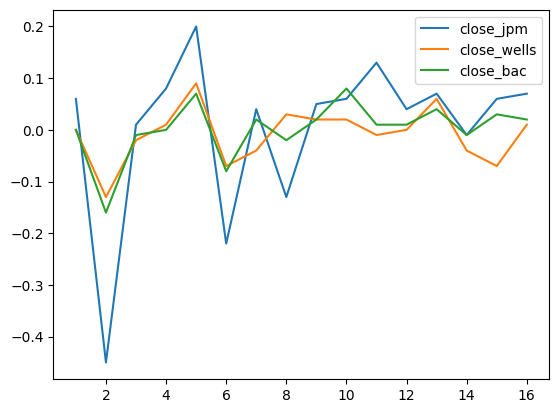

In [23]:
# edited/added
jpm = pd.read_csv('jpm.csv')
jpm["date_time"] = pd.to_datetime(jpm["date_time"])
wells = pd.read_csv('wells.csv')
wells["date_time"] = pd.to_datetime(wells["date_time"])
bac = pd.read_csv('bac.csv')
bac["date_time"] = pd.to_datetime(bac["date_time"])

# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', 
                          suffixes=('', '_wells'), direction='nearest')

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', 
                              suffixes=('_jpm', '_bac'), direction='nearest')

# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
plt.show()


### Using merge_asof() to create dataset

The `merge_asof()` function can be used to create datasets where you
have a table of start and stop dates, and you want to use them to create
a flag in another table. You have been given `gdp`, which is a table of
quarterly GDP values of the US during the 1980s. Additionally, the table
`recession` has been given to you. It holds the starting date of every
US recession since 1980, and the date when the recession was declared to
be over. Use `merge_asof()` to merge the tables and create a status flag
if a quarter was during a recession. Finally, to check your work, plot
the data in a bar chart.

The tables `gdp` and `recession` have been loaded for you.

-   Using `merge_asof()`, merge `gdp` and `recession` on `date`, with
    `gdp` as the left table. Save to the variable `gdp_recession`.
-   Create a `list` using a list comprehension and a conditional
    expression, named `is_recession`, where for each row if the
    `gdp_recession['econ_status']` value is equal to 'recession' then
    enter `'r'` else `'g'`.
-   Using `gdp_recession`, plot a bar chart of `gdp` versus `date`,
    setting the `color` argument equal to `is_recession`.


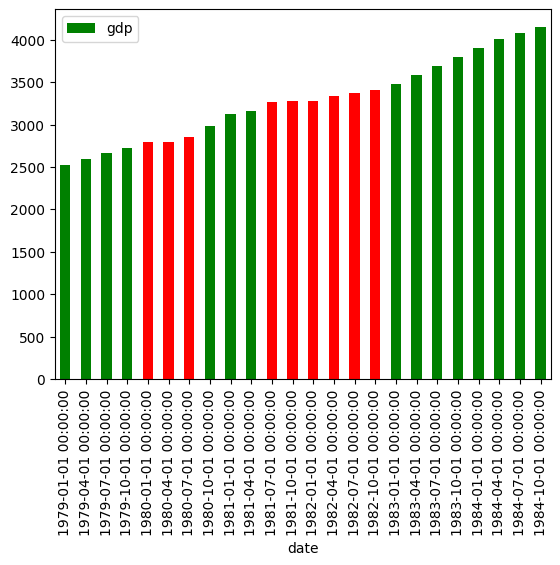

In [24]:
# edited/added
gdp = pd.read_csv('gdp3.csv')
gdp["date"] = pd.to_datetime(gdp["date"])
recession = pd.read_csv('recession.csv')
recession["date"] = pd.to_datetime(recession["date"])

# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()


### merge_asof() and merge_ordered() differences

The `merge_asof()` and `merge_ordered()` functions are similar in the
type of merge they perform and the input arguments they use. In this
exercise, think about how the functions are different.

-   Drag and drop the statement into the appropriate box for either the
    `merge_asof()` function, the `merge_ordered()` function, or both if
    it applies to both functions.

##### merge_asof()

- Has an argument that can be set to `'forward'` to select the first row
in the right table whose key column is greater than or equal to the
left’s.
- It can be used to do fuzzy matching of dates between tables.
After matching two tables, if there are missing values at the top of the
table from the right table, this function can fill them in.

##### both

- This function can set the suffix for overlapping column names.
- This function can be used when working with ordered or time-series data.

##### .merge_ordered

- It allows for a right join during the merge.
- If it cannot match the rows of the tables exactly, it can use forward
fill to interpolate the missing data.

## Selecting data with .query()

### Explore financials with .query()

You have been given a table of financial data from some popular social
network companies called `social_fin`. All of the values are in
thousands of US dollars.

Use the `.query()` method and the IPython shell to explore `social_fin`
and select the **True** statement.

- [ ] There 2 rows where the `value` is greater than $50,000,000K.
- [ ] There are 3 rows for total revenue for Facebook.
- [x] There are 6 rows where the net income has a negative value.
- [ ] There are 45 rows, where the gross profit is greater than $100K.

### Subsetting rows with .query()

In this exercise, you will revisit GDP and population data for Australia
and Sweden from the World Bank and expand on it using the `.query()`
method. You'll merge the two tables and compute the GDP per capita.
Afterwards, you'll use the `.query()` method to sub-select the rows and
create a plot. Recall that you will need to merge on multiple columns in
the proper order.

The tables `gdp` and `pop` have been loaded for you.

-   Use `merge_ordered()` on `gdp` and `pop` on columns `country` and `date`
with the fill feature, save to `gdp_pop` and print.
-   Add a column named `gdp_per_capita` to `gdp_pop` that divides `gdp` by
`pop`.
-   Pivot `gdp_pop` so `values='gdp_per_capita'`, `index='date'`, and
`columns='country'`, save as `gdp_pivot`.
-   Use `.query()` to select rows from `gdp_pivot` where `date` is greater
than equal to `"1991-01-01"`. Save as `recent_gdp_pop`.


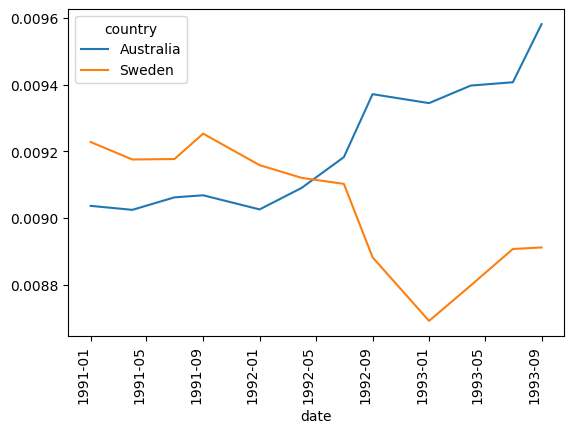

In [25]:
 # edited/added
gdp = pd.read_csv('gdp4.csv')
gdp["date"] = pd.to_datetime(gdp["date"])
pop = pd.read_csv('pop2.csv')
pop["date"] = pd.to_datetime(pop["date"])

# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()


## Reshaping data with .melt()

### Select the right .melt() arguments

You are given a table named `inflation`. Chose the option to get the
***same*** output as the table below.

       country    indicator  year  annual
    0   Brazil  Inflation %  2017    3.45
    1   Canada  Inflation %  2017    1.60
    2   France  Inflation %  2017    1.03
    3    India  Inflation %  2017    2.49
    4   Brazil  Inflation %  2018    3.66
    5   Canada  Inflation %  2018    2.27
    6   France  Inflation %  2018    1.85
    7    India  Inflation %  2018    4.86
    8   Brazil  Inflation %  2019    3.73
    9   Canada  Inflation %  2019    1.95
    10  France  Inflation %  2019    1.11
    11   India  Inflation %  2019    7.66

- [ ] `inflation.melt(id_vars=['country','indicator'], var_name='annual')`
- [ ] `inflation.melt(id_vars=['country'], var_name='indicator', value_name='annual')`
- [x] `inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')`
- [ ] `inflation.melt(id_vars=['country'], var_name='year', value_name='annual')`

### Using .melt() to reshape government data

The US Bureau of Labor Statistics (BLS) often provides data series in an
easy-to-read format - it has a separate column for each month, and each
year is a different row. Unfortunately, this wide format makes it
difficult to plot this information over time. In this exercise, you will
reshape a table of US unemployment rate data from the BLS into a form
you can plot using `.melt()`. You will need to add a date column to the
table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called
`ur_wide`. You are encouraged to view the table in the IPython shell
before beginning the exercise.

-   Use `.melt()` to unpivot all of the columns of `ur_wide` except
    `year` and ensure that the columns with the months and values are
    named `month` and `unempl_rate`, respectively. Save the result as
    `ur_tall`.
-   Add a column to `ur_tall` named `date` which combines the `year` and
    `month` columns as *year*-*month* format into a larger string, and
    converts it to a date data type.
-   Sort `ur_tall` by date and save as `ur_sorted`.
-   Using `ur_sorted`, plot `unempl_rate` on the y-axis and `date` on
    the x-axis.


/var/folders/rs/d1h43yxd60dc0_p4pgk1kj1c0000gn/T/ipykernel_6408/1702019195.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year'])


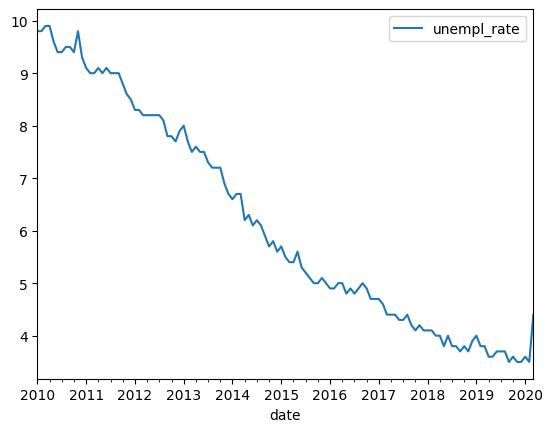

In [26]:
# edited/added
ur_wide = pd.read_csv('ur_wide.csv')

# Unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', 
                       value_name='unempl_rate')

# edited/added
ur_tall = ur_tall[ur_tall['unempl_rate'] != "nan"].dropna().astype(str)

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# edited/added
ur_sorted['unempl_rate'] = pd.to_numeric(ur_sorted['unempl_rate'])

# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()


### Using .melt() for stocks vs bond performance

It is widespread knowledge that the price of bonds is inversely related
to the price of stocks. In this last exercise, you'll review many of the
topics in this chapter to confirm this. You have been given a table of
percent change of the US 10-year treasury bond price. It is in a wide
format where there is a separate column for each year. You will need to
use the `.melt()` method to reshape this table.

Additionally, you will use the `.query()` method to filter out unneeded
data. You will merge this table with a table of the percent change of
the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables `ten_yr` and `dji` have been loaded for you.

-   Use `.melt()` on `ten_yr` to unpivot everything except the `metric`
    column, setting `var_name='date'` and `value_name='close'`. Save the
    result to `bond_perc`.
-   Using the `.query()` method, select only those rows were `metric`
    equals 'close', and save to `bond_perc_close`.
-   Use `merge_ordered()` to merge `dji` (left table) and
    `bond_perc_close` on `date` with an inner join, and set `suffixes`
    equal to `('_dow', '_bond')`. Save the result to `dow_bond`.
-   Using `dow_bond`, plot only the Dow and bond values.


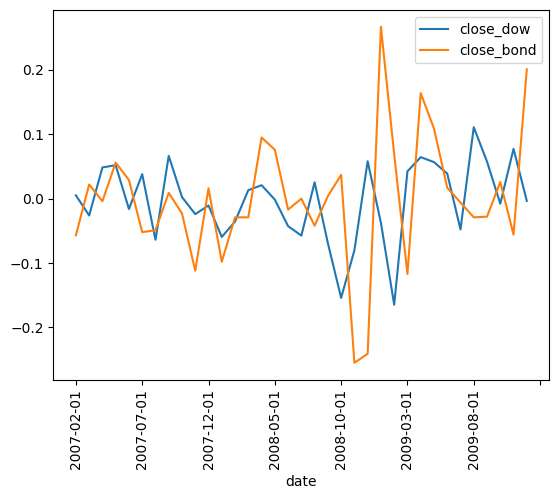

In [27]:
# edited/added
ten_yr = pd.read_csv('ten_yr.csv')
dji = pd.read_csv('dji.csv')

# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', 
                            suffixes=('_dow', '_bond'), how='inner')

# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()


## Course wrap-up


### Course wrap-up

Congratulations! You have completed all the videos and exercises. You should feel proud.

### You're this high performance race car now

It wasn't long ago when you started the course. Now you're like this high-performance race car when it comes to combining data. In this course, we covered a lot of topics.

1 Photo by jae park from Pexels

### Data merging basics
In chapter one, you performed an inner join with the default settings using the merge() method. You also learned about the different types of table relationships and merging multiple tables. These are the basics of using the combining data with the merge() method.

### Merging tables with different join types

In the second chapter, you expanded your joining skills to many different types of joins. You also learned how to merge a table to itself and how to merge using indexes.

### Advanced merging and concatenating

In the third chapter, you learned about filtering joins, such as semi- and anti joins. You also learned how to combine data vertically with the concat() method and about the importance of data integrity.

### Merging ordered and time-series data

In the last chapter you discovered how to merge ordered and time-series data with merge_ordered() and merge_asof(). In the last lesson, you learned how to use melt().

### Thank you!

Thank you for completing the course and for the time you put in. I wish you luck as you continue your learning journey.
